In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
import csv
%matplotlib inline

## Note that the source data file used below is a version that was modified via Pandas to anonymize the data. The code used to perform the anonymization is available in the notebook named "Anonymize_Data_Notebook."

In [2]:
# read in Excel file; use col 1 ("EnrollmentID") as index
# sourcefile also avail here: https://www.dropbox.com/s/oz2rhnb7ryp34dw/ALVS_Enrollments_SY14-16_Anon.xlsx?dl=0
enr = pd.read_excel('ALVS_Enrollments_SY14-16_Anon.xlsx', index_col=1)

### There were about 69,000 rows in original source data
### I read in a file for just two years (SY 2014-2015 and SY 2015-2016), reducing the rows to about 34,000.

In [3]:
enr.shape

(33593, 117)

### Some of these columns, e.g., the date columns, may need to be converted in order for calculations to be done.

Below you can see some of my unsuccessful attempts to find the columns that have the word 'date' in them.

### In the next few cells, I converted the column names to a list so I could slice through them and explore what kinds of variables I had available.

#### Some promising variables:
* OnSchedulePercent'
* u'GradeToDate',
* u'LetterGradeToDate',
* u'OverallGrade',
* u'OverdueActivities',
* u'TotalPointsEarnedOnActivitiesDueToNow',
* u'TotalPointsPossibleDueToNow',
* u'TotalPointsEarnedOnActivities',
* u'TotalPointsAttempted',
* u'TotalPointsPossible',
* u'ExtraCredit',
* u'NumOfScoredActivitiesByCourse',
* u'NumOfScoredActivitiesCompletedByCourse',

In [164]:
col_list = list(enr.columns)

In [165]:
col_list[:20]

[u'LastDueDate',
 u'Extension_Granted',
 u'ExtensionDate',
 u'EnrollmentCount',
 u'ProductTypeID',
 u'CustomerName',
 u'CustomerID',
 u'UniverseName',
 u'UniverseID',
 u'TopParentOrgName',
 u'TopParentOrgID',
 u'ParentOrgName',
 u'ParentOrgID',
 u'OrgName',
 u'OrgState',
 u'OrgID',
 u'OrgType',
 u'ImportOrgID',
 u'ImportUserID',
 u'FirstName']

In [166]:
col_list[21:50]

[u'LastName',
 u'LogonID',
 u'Email',
 u'MessageCenterID',
 u'StudentPhone',
 u'SchoolYear',
 u'TimePeriodName',
 u'Semester',
 u'SemesterID',
 u'TrackName',
 u'SubjectName',
 u'CommonCore',
 u'ProductCode',
 u'ProductName',
 u'SectionID',
 u'ClassroomName',
 u'ClasssroomIsActive',
 u'ClassroomArchiveDate',
 u'ClassroomArchived',
 u'ClassroomID',
 u'CopiedSection',
 u'ProgramID',
 u'ProgramCode',
 u'ProgramName',
 u'ClassroomEcode',
 u'ImportClassroomID',
 u'IsProctored',
 u'SpecialScheduleIND',
 u'EnrollmentStatus']

In [167]:
col_list[51:80]

[u'EnrollmentStatusALHS',
 u'EnrollmentStatusALHSID',
 u'EnrollmentDate',
 u'StudentStartDate',
 u'ClassroomStartDate',
 u'ALHSPaidEnrollment',
 u'Started',
 u'Served',
 u'EnrollmentDays',
 u'Readiness',
 u'StartToFirstAccessDays',
 u'StartedThree',
 u'CourseDurationDays',
 u'DaysSinceStart',
 u'CreditStatusCategory',
 u'LastLogin',
 u'FirstAccessed',
 u'LastAccessed',
 u'DaysSinceLastAccess',
 u'TotalTimeSpentOnCourse_Hours',
 u'TotalTimeSpentOnCourse_Minutes',
 u'TotalTimeSpentOnCourse',
 u'LA28',
 u'Dropped',
 u'EffectiveWithdrawalDate',
 u'WithdrawalDate',
 u'WithdrawReason',
 u'WithdrawCreditStatus',
 u'FinalGrade']

In [168]:
col_list[81:110]

[u'Passing',
 u'ValidGrade',
 u'CompletionDate',
 u'CompletionDaysOld',
 u'CompletionDaysNew',
 u'QualityOfWork',
 u'Progress',
 u'OnSchedulePercent',
 u'GradeToDate',
 u'LetterGradeToDate',
 u'OverallGrade',
 u'TeacherCustomerID',
 u'TeacherEnrollID',
 u'TeacherName',
 u'TeacherEmail',
 u'TeacherEnrollmentStatusTypeID',
 u'TeacherLastLogin',
 u'MentorCustomerID',
 u'MentorName',
 u'MentorEmail',
 u'MentorLastLogin',
 u'SCCustomerID',
 u'SCName',
 u'SCEmail',
 u'SCLastLogin',
 u'ActivityCountComplete',
 u'ActivityCountTotal',
 u'ActivityCompletePerc',
 u'ActivityCountDueToNow']

In [169]:
col_list[111:len(col_list)+1]

[u'OverdueActivities',
 u'TotalPointsEarnedOnActivitiesDueToNow',
 u'TotalPointsPossibleDueToNow',
 u'TotalPointsEarnedOnActivities',
 u'TotalPointsAttempted',
 u'TotalPointsPossible',
 u'ExtraCredit',
 u'NumOfScoredActivitiesByCourse',
 u'NumOfScoredActivitiesCompletedByCourse',
 u'TotalPointsPossible_Non_ModifiedCourseWithDiagExcluded',
 u'TotalPointsPossible_Non_ModifiedCourse',
 u'TotalPointsPossible_ModifiedCourse_TeacherScoredWork',
 u'TotalPointsPossible_ModifiedCourse_ComputerScoredWork',
 u'TotalPointsPossible_ModifiedCourse',
 u'TotalPointsExcluded',
 u'NON_DIAG_Points_Excluded',
 u'TotalPointsEarned_TeacherScoredActivities',
 u'TotalPointsEarned_ComputerScoredActivities',
 u'TestOutPoints',
 u'ExcusedPoints',
 u'Count_of_Teacher_Excluded_Activities',
 u'CoachEmails',
 u'ALHS_Pathway',
 u'ALHSWithdrawnFC',
 'Unnamed: 136']

### Then I checked my counts.
### There was growth in enrollments between the school year 14-15 and 15-16.
I'll need to take that into account for any kind of seasonal/semester view. The underlying growth trend could be a confounding factor, just like with the bike rental data we explored in class.

In [170]:
enr.groupby('SchoolYear').count()

,LastDueDate,Extension_Granted,ExtensionDate,EnrollmentCount,ProductTypeID,CustomerName,CustomerID,UniverseName,UniverseID,TopParentOrgName,...,NON_DIAG_Points_Excluded,TotalPointsEarned_TeacherScoredActivities,TotalPointsEarned_ComputerScoredActivities,TestOutPoints,ExcusedPoints,Count_of_Teacher_Excluded_Activities,CoachEmails,ALHS_Pathway,ALHSWithdrawnFC,Unnamed: 136
SchoolYear,,,,,,,,,,,,,,,,,,,,,
SY 14-15,13099,1086,1975,15067,15067,15067,15067,15067,15067,15057,...,0,0,0,15067,15067,0,11246,15067,0,0
SY 15-16,18066,1844,1844,18525,18525,18525,18525,18525,18525,18518,...,18525,18525,18525,18525,18525,18525,14450,18525,0,0
SchoolYear,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0


### Because my definition of student success will involve a grade of some kind, I decided to explore relationship between grade and other factors, e.g., subject.

In [172]:
enr.columns[enr.columns.str.contains('Grade')]

Index([u'FinalGrade', u'GradeTranslation', u'ValidGrade', u'GradeToDate',
       u'LetterGradeToDate', u'OverallGrade'],
      dtype='object')

In [173]:
enr.groupby('GradeTranslation').count()

,LastDueDate,Extension_Granted,ExtensionDate,EnrollmentCount,ProductTypeID,CustomerName,CustomerID,UniverseName,UniverseID,TopParentOrgName,...,NON_DIAG_Points_Excluded,TotalPointsEarned_TeacherScoredActivities,TotalPointsEarned_ComputerScoredActivities,TestOutPoints,ExcusedPoints,Count_of_Teacher_Excluded_Activities,CoachEmails,ALHS_Pathway,ALHSWithdrawnFC,Unnamed: 136
GradeTranslation,,,,,,,,,,,,,,,,,,,,,
A,7481,601,775,7802,7802,7802,7802,7802,7802,7798,...,4063,4063,4063,7802,7802,4063,6457,7802,0,0
B,5852,663,866,6140,6140,6140,6140,6140,6140,6140,...,3189,3189,3189,6140,6140,3189,4724,6140,0,0
C,3582,478,608,3723,3723,3723,3723,3723,3723,3722,...,2059,2059,2059,3723,3723,2059,2701,3723,0,0
D,2316,387,497,2410,2410,2410,2410,2410,2410,2410,...,1401,1401,1401,2410,2410,1401,1678,2410,0,0
E,7123,651,852,7814,7814,7814,7814,7814,7814,7813,...,4452,4452,4452,7814,7814,4452,5996,7814,0,0
GradeTranslation,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
O,171,0,0,175,175,175,175,175,175,175,...,158,158,158,175,175,158,133,175,0,0


## How many students completed the course?
## At this stage I want to explore only those students.
Future exploration could be done on progress throughout a course, but that would require combining data week-over-week or month-over-month for the same course and same student. 

At this stage of the project the cleanest option is to look at students who completed the course, examine their final grade, and then try to identify factors that are associated with high and low final grades.

In [174]:
enr.groupby('EnrollmentStatus').count()

,LastDueDate,Extension_Granted,ExtensionDate,EnrollmentCount,ProductTypeID,CustomerName,CustomerID,UniverseName,UniverseID,TopParentOrgName,...,NON_DIAG_Points_Excluded,TotalPointsEarned_TeacherScoredActivities,TotalPointsEarned_ComputerScoredActivities,TestOutPoints,ExcusedPoints,Count_of_Teacher_Excluded_Activities,CoachEmails,ALHS_Pathway,ALHSWithdrawnFC,Unnamed: 136
EnrollmentStatus,,,,,,,,,,,,,,,,,,,,,
Active,694,33,33,716,716,716,716,716,716,716,...,687,687,687,716,716,687,683,716,0,0
Complete,26525,2780,3598,28064,28064,28064,28064,28064,28064,28058,...,15322,15322,15322,28064,28064,15322,21689,28064,0,0
EnrollmentStatus,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,0
Withdrawn,3946,117,188,4812,4812,4812,4812,4812,4812,4801,...,2516,2516,2516,4812,4812,2516,3324,4812,0,0


In [175]:
# Create dataframe of only those students who completed the course
enr_complete = enr[enr['EnrollmentStatus'] == 'Complete']

In [176]:
# Create binary 'dummy' columns for each letter grade
grade_dummies = pd.get_dummies(enr_complete.GradeTranslation, prefix='Grade')

In [177]:
grade_dummies.count()

Grade_A    28064
Grade_B    28064
Grade_C    28064
Grade_D    28064
Grade_E    28064
Grade_O    28064
dtype: int64

In [178]:
grade_dummies.sum()

Grade_A    7802.0
Grade_B    6140.0
Grade_C    3723.0
Grade_D    2410.0
Grade_E    7814.0
Grade_O     175.0
dtype: float64

In [179]:
# Concatenate the dummy columns to the main dataframe
enr_complete = pd.concat([enr_complete, grade_dummies], axis=1)

### Let's explore final grade obtained by subject.

In [184]:
enr_complete.groupby('SubjectName')[letter_grades].sum()

,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_O
SubjectName,,,,,,
Electives,721.0,563.0,302.0,231.0,626.0,0.0
English,893.0,936.0,649.0,399.0,1260.0,3.0
Math,1836.0,1591.0,976.0,650.0,2192.0,6.0
Science,1367.0,833.0,543.0,365.0,1192.0,4.0
Social Studies,1489.0,1137.0,655.0,372.0,1318.0,7.0
World Language,1496.0,1080.0,598.0,393.0,1226.0,155.0


### There are a decent number of A's, but there are also a number of E's (which is used instead of F).
### There are also O's, ~~and I will need to find out what that grade means.~~ which is probably related to a request by a school district to provide a special grade designation.

In [185]:
enr_complete[enr_complete['Grade_O'] != 0].groupby('TopParentOrgName').sum()

,Unnamed: 136,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_O
TopParentOrgName,,,,,,,
ALVS - Full Time Program,NaN,0.0,0.0,0.0,0.0,0.0,7.0
ALVS - Part Time Program,NaN,0.0,0.0,0.0,0.0,0.0,2.0
ALVS District Partners,NaN,0.0,0.0,0.0,0.0,0.0,13.0
Aiken County Public School District,NaN,0.0,0.0,0.0,0.0,0.0,153.0


In [186]:
grades_by_subject = enr_complete.groupby('SubjectName')[letter_grades].sum()

In [188]:
# Create dummy encoding for subject
subject_dummies = pd.get_dummies(enr_complete.SubjectName, prefix='Subject')

In [189]:
subject_dummies.count()

Subject_Electives         28064
Subject_English           28064
Subject_Math              28064
Subject_Science           28064
Subject_Social Studies    28064
Subject_World Language    28064
dtype: int64

In [190]:
subject_dummies.sum()

Subject_Electives         2443.0
Subject_English           4140.0
Subject_Math              7251.0
Subject_Science           4304.0
Subject_Social Studies    4978.0
Subject_World Language    4948.0
dtype: float64

In [191]:
enr_complete = pd.concat([enr_complete, subject_dummies], axis=1)

In [192]:
subjects = list(subject_dummies.columns)

In [193]:
subjects

[u'Subject_Electives',
 u'Subject_English',
 u'Subject_Math',
 u'Subject_Science',
 u'Subject_Social Studies',
 u'Subject_World Language']

In [194]:
enr_complete.groupby('SubjectName')[letter_grades].sum()

,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_O
SubjectName,,,,,,
Electives,721.0,563.0,302.0,231.0,626.0,0.0
English,893.0,936.0,649.0,399.0,1260.0,3.0
Math,1836.0,1591.0,976.0,650.0,2192.0,6.0
Science,1367.0,833.0,543.0,365.0,1192.0,4.0
Social Studies,1489.0,1137.0,655.0,372.0,1318.0,7.0
World Language,1496.0,1080.0,598.0,393.0,1226.0,155.0


In [195]:
enr_complete.groupby("SubjectName").sum()

,Unnamed: 136,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_O,Subject_Electives,Subject_English,Subject_Math,Subject_Science,Subject_Social Studies,Subject_World Language
SubjectName,,,,,,,,,,,,,
Electives,NaN,721.0,563.0,302.0,231.0,626.0,0.0,2443.0,0.0,0.0,0.0,0.0,0.0
English,NaN,893.0,936.0,649.0,399.0,1260.0,3.0,0.0,4140.0,0.0,0.0,0.0,0.0
Math,NaN,1836.0,1591.0,976.0,650.0,2192.0,6.0,0.0,0.0,7251.0,0.0,0.0,0.0
Science,NaN,1367.0,833.0,543.0,365.0,1192.0,4.0,0.0,0.0,0.0,4304.0,0.0,0.0
Social Studies,NaN,1489.0,1137.0,655.0,372.0,1318.0,7.0,0.0,0.0,0.0,0.0,4978.0,0.0
World Language,NaN,1496.0,1080.0,598.0,393.0,1226.0,155.0,0.0,0.0,0.0,0.0,0.0,4948.0


In [196]:
enr_complete.GradeTranslation.value_counts()

E    7814
A    7802
B    6140
C    3723
D    2410
O     175
Name: GradeTranslation, dtype: int64

In [197]:
enr_complete.groupby("SubjectName").GradeTranslation.value_counts()

SubjectName     GradeTranslation
Electives       A                    721
                E                    626
                B                    563
                C                    302
                D                    231
English         E                   1260
                B                    936
                A                    893
                C                    649
                D                    399
                O                      3
Math            E                   2192
                A                   1836
                B                   1591
                C                    976
                D                    650
                O                      6
Science         A                   1367
                E                   1192
                B                    833
                C                    543
                D                    365
                O                      4
Social Studies  A       

### It looks like E's and A's are the most common grades among all enrollments in this time period.


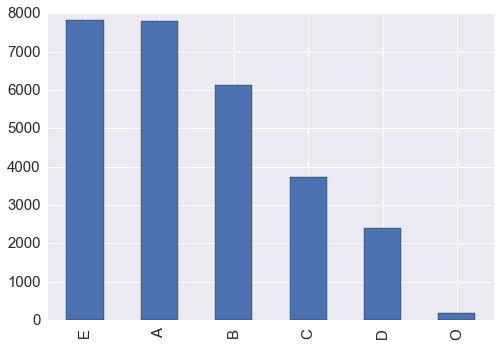

In [198]:
enr_complete.GradeTranslation.value_counts().plot(kind='bar')

In [199]:
enr_complete.EnrollmentStatus.value_counts()

Complete    28064
Name: EnrollmentStatus, dtype: int64

### Most students enrolling at Apex enroll in a math class.

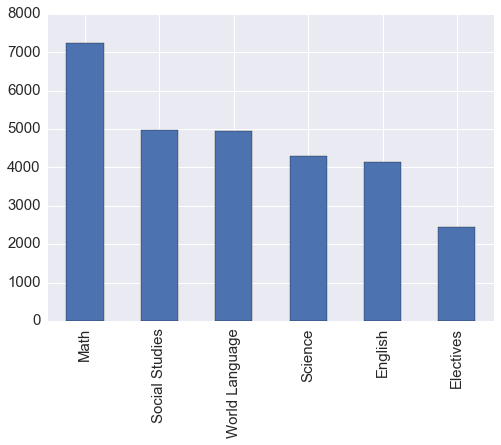

In [200]:
enr_complete.SubjectName.value_counts().plot(kind='bar')

### Are math classes harder than other classes, like English?

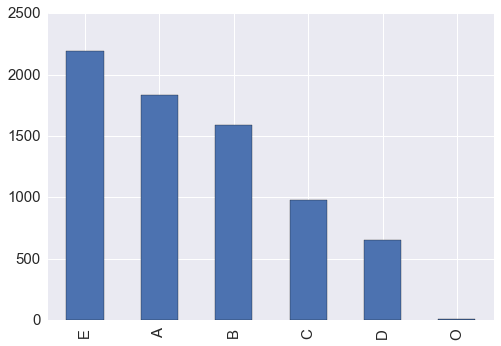

In [201]:
# Get breakdown of letter grade for Math
enr_complete[enr_complete['SubjectName'] == 'Math'].GradeTranslation.value_counts().plot(kind='bar')

### Actually in English, among students who don't fail, the most common grade is a B.
### Note that the frequency scaling is different between the above and below graphs. That will need to be corrected for any final comparison visuazliation.

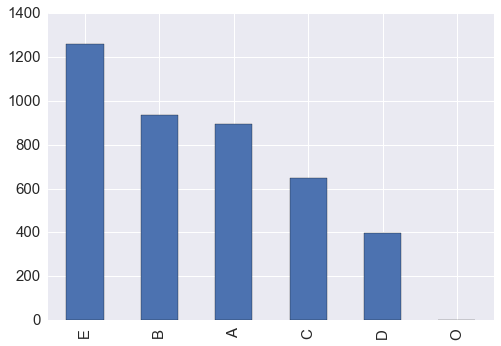

In [202]:
# Get breakdown of letter grade for English
enr_complete[enr_complete['SubjectName'] == 'English'].GradeTranslation.value_counts().plot(kind='bar')

In [203]:
enr_complete.groupby('SubjectName')[letter_grades].sum()

,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_O
SubjectName,,,,,,
Electives,721.0,563.0,302.0,231.0,626.0,0.0
English,893.0,936.0,649.0,399.0,1260.0,3.0
Math,1836.0,1591.0,976.0,650.0,2192.0,6.0
Science,1367.0,833.0,543.0,365.0,1192.0,4.0
Social Studies,1489.0,1137.0,655.0,372.0,1318.0,7.0
World Language,1496.0,1080.0,598.0,393.0,1226.0,155.0


### In what subject are the most points available?

In [207]:
# Points earned by subject for teacher-scored work
enr_complete['TotalPointsEarned_TeacherScoredActivities'].groupby(enr_complete['SubjectName']).sum()

SubjectName
Electives          645404.5
English           1400039.9
Math              1942289.7
Science           1072350.5
Social Studies    1829299.2
World Language    1527599.5
Name: TotalPointsEarned_TeacherScoredActivities, dtype: float64

In [208]:
# Points earned by subject for teacher-scored work
enr_complete['TotalPointsEarned_ComputerScoredActivities'].groupby(enr_complete['SubjectName']).sum()

SubjectName
Electives          618078.0
English           1209701.7
Math              3586219.4
Science           1240771.9
Social Studies    2015588.4
World Language     891662.0
Name: TotalPointsEarned_ComputerScoredActivities, dtype: float64

In [209]:
# Points available by subject for entire course
enr_complete['TotalPointsPossible'].groupby(enr_complete['SubjectName']).sum()

SubjectName
Electives          3628644
English            7221159
Math              15144157
Science            7164543
Social Studies    10817301
World Language     6947320
Name: TotalPointsPossible, dtype: int64

In [210]:
enr_complete['TotalPointsAttempted'].groupby(enr_complete['SubjectName']).sum()

SubjectName
Electives          2885500
English            5492583
Math              12094245
Science            5450327
Social Studies     8574739
World Language     5610456
Name: TotalPointsAttempted, dtype: int64

In [211]:
enr_complete['TotalPointsEarnedOnActivities'].groupby(enr_complete['SubjectName']).sum()

SubjectName
Electives         2471111.5
English           4573893.6
Math              9717759.1
Science           4580911.4
Social Studies    7287399.0
World Language    4761288.5
Name: TotalPointsEarnedOnActivities, dtype: float64

In [212]:
# Verify expectation that total points earned is less than or equal to total points possible
enr_complete['TotalPointsEarnedOnActivities'].groupby(enr_complete['SubjectName']).sum() <= enr_complete['TotalPointsPossible'].groupby(enr_complete['SubjectName']).sum()

SubjectName
Electives         True
English           True
Math              True
Science           True
Social Studies    True
World Language    True
dtype: bool

In [213]:
enr_complete['TotalPointsEarned_ComputerScoredActivities'].groupby(enr_complete['SubjectName']).sum() + enr_complete['TotalPointsEarned_TeacherScoredActivities'].groupby(enr_complete['SubjectName']).sum()

SubjectName
Electives         1263482.5
English           2609741.6
Math              5528509.1
Science           2313122.4
Social Studies    3844887.6
World Language    2419261.5
dtype: float64

In [214]:
# Determine if computer scored activities ...
(enr_complete['TotalPointsEarned_ComputerScoredActivities'].groupby(enr_complete['SubjectName']).sum() + enr_complete['TotalPointsEarned_TeacherScoredActivities'].groupby(enr_complete['SubjectName']).sum()) == enr_complete['TotalPointsPossible'].groupby(enr_complete['SubjectName']).sum() 

SubjectName
Electives         False
English           False
Math              False
Science           False
Social Studies    False
World Language    False
dtype: bool

### Examine overdue activities by subject and by final letter grade

In [215]:
enr_complete['OverdueActivities'].groupby(enr_complete['SubjectName']).sum().sort

<bound method Series.sort of SubjectName
Electives         25100
English           68922
Math              92140
Science           52387
Social Studies    79098
World Language    30922
Name: OverdueActivities, dtype: int64>

### It requires more research, but the below breakdown of overdue activities by final letter grade lends support to the hypothesis that the problem isn't that the course is too hard -- it's that the student's are doing the work.
### Students who do the assignments, regardless of the grade, tend to achieve a higher final grade.

In [216]:
enr_complete['OverdueActivities'].groupby(enr_complete['GradeTranslation']).sum().sort

<bound method Series.sort of GradeTranslation
A      1132
B      4298
C      9186
D     13350
E    316563
O      4040
Name: OverdueActivities, dtype: int64>

In [218]:
enr_complete.shape

(28064, 148)

### Most course have a range of approximately 50-75 scored activities

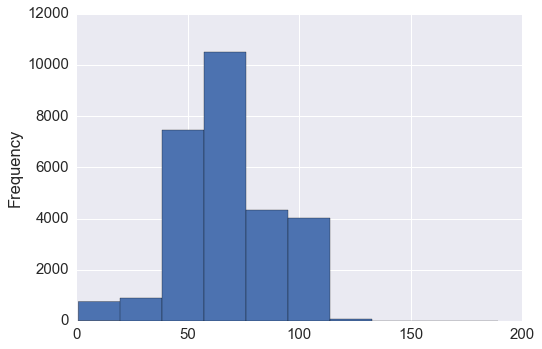

In [219]:
enr_complete['NumOfScoredActivitiesByCourse'].plot(kind='hist')

### Of the scored activities in a course, most students complete around 40-70 of them.

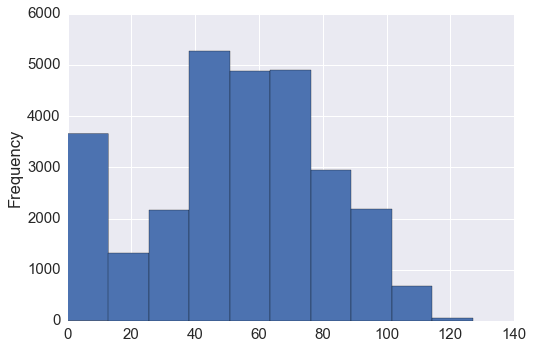

In [220]:
enr_complete['NumOfScoredActivitiesCompletedByCourse'].plot(kind='hist')

In [221]:
enr_complete.groupby('SemesterID').sum()

,Unnamed: 136,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_O,Subject_Electives,Subject_English,Subject_Math,Subject_Science,Subject_Social Studies,Subject_World Language
SemesterID,,,,,,,,,,,,,
1,NaN,2598.0,2190.0,1300.0,825.0,2957.0,164.0,773.0,1481.0,2170.0,1751.0,1828.0,2031.0
2,NaN,2773.0,2406.0,1580.0,1122.0,2996.0,9.0,1064.0,1758.0,2533.0,1632.0,1990.0,1909.0
3,NaN,2431.0,1544.0,843.0,463.0,1861.0,2.0,606.0,901.0,2548.0,921.0,1160.0,1008.0


In [222]:
enr_complete.groupby('Semester').sum()

,Unnamed: 136,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_O,Subject_Electives,Subject_English,Subject_Math,Subject_Science,Subject_Social Studies,Subject_World Language
Semester,,,,,,,,,,,,,
Fall,NaN,2598.0,2190.0,1300.0,825.0,2957.0,164.0,773.0,1481.0,2170.0,1751.0,1828.0,2031.0
Spring,NaN,2773.0,2406.0,1580.0,1122.0,2996.0,9.0,1064.0,1758.0,2533.0,1632.0,1990.0,1909.0
Summer,NaN,2431.0,1544.0,843.0,463.0,1861.0,2.0,606.0,901.0,2548.0,921.0,1160.0,1008.0


In [227]:
enr_complete.groupby('Passing').sum()

,Unnamed: 136,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_O,Subject_Electives,Subject_English,Subject_Math,Subject_Science,Subject_Social Studies,Subject_World Language
Passing,,,,,,,,,,,,,
False,NaN,0.0,0.0,0.0,0.0,7814.0,175.0,626.0,1263.0,2198.0,1196.0,1325.0,1381.0
True,NaN,7802.0,6140.0,3723.0,2410.0,0.0,0.0,1817.0,2877.0,5053.0,3108.0,3653.0,3567.0


In [228]:
enr_complete.groupby('GradeTranslation').count()

,LastDueDate,Extension_Granted,ExtensionDate,EnrollmentCount,ProductTypeID,CustomerName,CustomerID,UniverseName,UniverseID,TopParentOrgName,...,Grade_C,Grade_D,Grade_E,Grade_O,Subject_Electives,Subject_English,Subject_Math,Subject_Science,Subject_Social Studies,Subject_World Language
GradeTranslation,,,,,,,,,,,,,,,,,,,,,
A,7481,601,775,7802,7802,7802,7802,7802,7802,7798,...,7802,7802,7802,7802,7802,7802,7802,7802,7802,7802
B,5852,663,866,6140,6140,6140,6140,6140,6140,6140,...,6140,6140,6140,6140,6140,6140,6140,6140,6140,6140
C,3582,478,608,3723,3723,3723,3723,3723,3723,3722,...,3723,3723,3723,3723,3723,3723,3723,3723,3723,3723
D,2316,387,497,2410,2410,2410,2410,2410,2410,2410,...,2410,2410,2410,2410,2410,2410,2410,2410,2410,2410
E,7123,651,852,7814,7814,7814,7814,7814,7814,7813,...,7814,7814,7814,7814,7814,7814,7814,7814,7814,7814
O,171,0,0,175,175,175,175,175,175,175,...,175,175,175,175,175,175,175,175,175,175


In [229]:
# for scikit-learn, map each grade to a number 
enr_complete['gradeID'] = enr_complete.GradeTranslation.map({'A':1,'B':2,'C':3,'D':4,'E':5,'O':6})

In [230]:
enr_complete[['gradeID','GradeTranslation']]

,gradeID,GradeTranslation
EnrollmentID,,
24795034,1,A
25126391,1,A
25239780,1,A
25261395,1,A
25261399,1,A
25261417,1,A
25334334,1,A
25409758,1,A
25441966,1,A


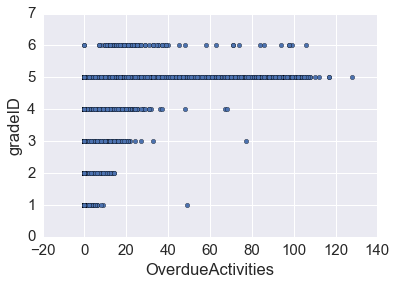

In [233]:
enr_complete.plot(kind='scatter',x='OverdueActivities',y='gradeID')

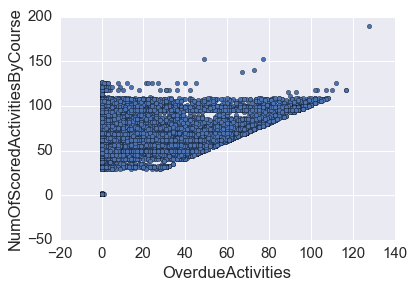

In [234]:
# Is there any relationship between amount of work in a course (number of scored activities) and amount of work not done (number of overdue activities)?
enr_complete.plot(kind='scatter',x='OverdueActivities',y='NumOfScoredActivitiesByCourse')

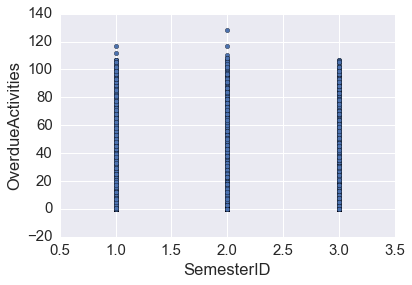

In [236]:
# Is there any relationship between number of overdue activities and which semester a student is in?
enr_complete.plot(kind='scatter',x="SemesterID",y="OverdueActivities")

In [237]:
# 'StartedThree' measures if a student started working on the course within three days of the course starting
# Check counts and check for nulls
enr_complete.groupby('StartedThree').count()

,LastDueDate,Extension_Granted,ExtensionDate,EnrollmentCount,ProductTypeID,CustomerName,CustomerID,UniverseName,UniverseID,TopParentOrgName,...,Grade_D,Grade_E,Grade_O,Subject_Electives,Subject_English,Subject_Math,Subject_Science,Subject_Social Studies,Subject_World Language,gradeID
StartedThree,,,,,,,,,,,,,,,,,,,,,
No,6577,731,933,7178,7178,7178,7178,7178,7178,7174,...,7178,7178,7178,7178,7178,7178,7178,7178,7178,7178
Yes,19948,2049,2665,20886,20886,20886,20886,20886,20886,20884,...,20886,20886,20886,20886,20886,20886,20886,20886,20886,20886


In [242]:
# StartedThree is a Yes/No field. Create a numeric 0/1 field for it.
enr_complete['StartedThree_binary'] = enr_complete['StartedThree'].map({'No':0,'Yes':1})

In [243]:
# Check counts of new column match counts in original Yes/No column above
enr_complete.groupby('StartedThree_binary').count()

,LastDueDate,Extension_Granted,ExtensionDate,EnrollmentCount,ProductTypeID,CustomerName,CustomerID,UniverseName,UniverseID,TopParentOrgName,...,Grade_D,Grade_E,Grade_O,Subject_Electives,Subject_English,Subject_Math,Subject_Science,Subject_Social Studies,Subject_World Language,gradeID
StartedThree_binary,,,,,,,,,,,,,,,,,,,,,
0,6577,731,933,7178,7178,7178,7178,7178,7178,7174,...,7178,7178,7178,7178,7178,7178,7178,7178,7178,7178
1,19948,2049,2665,20886,20886,20886,20886,20886,20886,20884,...,20886,20886,20886,20886,20886,20886,20886,20886,20886,20886


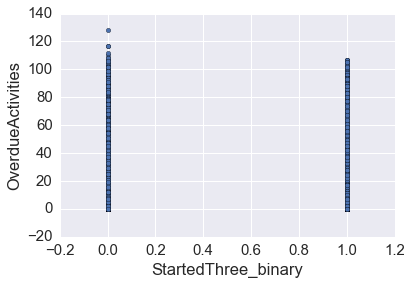

In [244]:
enr_complete.plot(kind='scatter',x='StartedThree_binary',y="OverdueActivities")

## Started_Three does not seem very predictive of the number of overdue activities students will have.

In [251]:
# What's the breakdown of grades by the 'StartedThree' value?
enr_complete['gradeID'].groupby(enr_complete['StartedThree_binary']).count()

StartedThree_binary
0     7178
1    20886
Name: gradeID, dtype: int64

In [252]:
enr_complete['StartedThree_binary'].groupby(enr_complete['gradeID']).count()

gradeID
1    7802
2    6140
3    3723
4    2410
5    7814
6     175
Name: StartedThree_binary, dtype: int64

### Most students who get an A, B, or E started within 3 days of the classroom starting. It's not clear if this will be that helpful since A, B, and E all share that characteristic, and we're trying to take steps to ensure a higher grade, not an equal chance of the highest or lowest grade.

## Let's start exploring the response variable.
## First, will take approach of exploring just passing or not rather than specific grades.

In [355]:
enr_complete.groupby('Passing').count()

,LastDueDate,Extension_Granted,ExtensionDate,EnrollmentCount,ProductTypeID,CustomerName,CustomerID,UniverseName,UniverseID,TopParentOrgName,...,Grade_O,Subject_Electives,Subject_English,Subject_Math,Subject_Science,Subject_Social Studies,Subject_World Language,gradeID,StartedThree_binary,No_Time_Test
Passing,,,,,,,,,,,,,,,,,,,,,
False,7294,651,852,7989,7989,7989,7989,7989,7989,7988,...,7989,7989,7989,7989,7989,7989,7989,7989,7989,7989
True,19231,2129,2746,20075,20075,20075,20075,20075,20075,20070,...,20075,20075,20075,20075,20075,20075,20075,20075,20075,20075


In [371]:
# Passing is a Yes/No field. Create a numeric 0/1 field for it.
# Example apply with lambda: sample['PR'] = sample['PR'].apply(lambda x: np.nan if x < 90 else x)
enr_complete['Passing_binary'] = enr_complete['Passing'].apply(lambda x: 1 if x else 0)

In [372]:
enr_complete.groupby('Passing_binary').sum()

,Unnamed: 136,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_O,Subject_Electives,Subject_English,Subject_Math,Subject_Science,Subject_Social Studies,Subject_World Language,gradeID,StartedThree_binary
Passing_binary,,,,,,,,,,,,,,,
0,NaN,0.0,0.0,0.0,0.0,7814.0,175.0,626.0,1263.0,2198.0,1196.0,1325.0,1381.0,40120,4783
1,NaN,7802.0,6140.0,3723.0,2410.0,0.0,0.0,1817.0,2877.0,5053.0,3108.0,3653.0,3567.0,40891,16103


In [375]:
# Do correlation matrix and decide on feature columns

enr_complete.corr()

,Unnamed: 136,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_O,Subject_Electives,Subject_English,Subject_Math,Subject_Science,Subject_Social Studies,Subject_World Language,gradeID,StartedThree_binary,Passing_binary
Unnamed: 136,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Grade_A,NaN,1.000000,-0.328387,-0.242683,-0.190192,-0.385466,-0.049155,0.011801,-0.057853,-0.032674,0.037623,0.021879,0.025132,-0.729750,0.139736,0.391454
Grade_B,NaN,-0.328387,1.000000,-0.206967,-0.162202,-0.328737,-0.041921,0.008716,0.007347,0.000903,-0.025989,0.010804,-0.000577,-0.292481,0.070218,0.333843
Grade_C,NaN,-0.242683,-0.206967,1.000000,-0.119869,-0.242941,-0.030980,-0.008232,0.029558,0.003378,-0.008155,-0.001481,-0.016100,0.027632,0.020283,0.246715
Grade_D,NaN,-0.190192,-0.162202,-0.119869,1.000000,-0.190395,-0.024279,0.009567,0.015592,0.007937,-0.001626,-0.018473,-0.010649,0.212707,-0.012706,0.193352
Grade_E,NaN,-0.385466,-0.328737,-0.242941,-0.190395,1.000000,-0.049207,-0.015289,0.024049,0.031430,-0.001408,-0.014162,-0.031645,0.818306,-0.189387,-0.984704
Grade_O,NaN,-0.049155,-0.041921,-0.030980,-0.024279,-0.049207,1.000000,-0.024461,-0.029123,-0.040551,-0.028690,-0.028489,0.147460,0.153727,-0.127860,-0.125569
Subject_Electives,NaN,0.011801,0.008716,-0.008232,0.009567,-0.015289,-0.024461,1.000000,-0.128454,-0.182262,-0.131425,-0.143389,-0.142864,-0.019310,-0.055087,0.019453
Subject_English,NaN,-0.057853,0.007347,0.029558,0.015592,0.024049,-0.029123,-0.128454,1.000000,-0.245536,-0.177050,-0.193169,-0.192461,0.042294,0.001128,-0.018807
Subject_Math,NaN,-0.032674,0.000903,0.003378,0.007937,0.031430,-0.040551,-0.182262,-0.245536,1.000000,-0.251214,-0.274085,-0.273080,0.030997,0.055526,-0.024145


In [376]:
feature_cols = ['TotalPointsAttempted','ActivityCompletePerc','ActivityCountTotal','CompletionDaysNew','CourseDurationDays','OverdueActivities','SemesterID','StartToFirstAccessDays']

## Start building models.

## Run KNN on just OverdueActivities

In [424]:
feature_cols = ['OverdueActivities']
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary

In [425]:
print X.shape
print y.shape

(28064, 1)
(28064,)


In [429]:
print "Y is of type {}".format(type(y))
print "X is of type {}".format(type(X))

Y is of type <class 'pandas.core.series.Series'>
X is of type <class 'pandas.core.frame.DataFrame'>


In [430]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

## Determine if there is a linear relationship between number of overdue activities and likelihood of predicting a 0 (non-passing grade).

In [490]:
# Create empty list and fill it with predicted values for 0-100 overdue activities

preds = []

for i in range(0,101):
    preds.append(knn.predict(i))

In [491]:
len(preds)

101

In [492]:
# Create dataframe of predictions
pred_passing_df = pd.DataFrame(preds,columns=["Pred Passing Ind Overdue Only"])

In [493]:
pred_passing_df.head()

,Pred Passing Ind Overdue Only
0,1
1,1
2,1
3,1
4,0


In [494]:
pred_passing_df['Num Overdue Assignments'] = np.arange(0,101)

In [495]:
pred_passing_df.head()

,Pred Passing Ind Overdue Only,Num Overdue Assignments
0,1,0
1,1,1
2,1,2
3,1,3
4,0,4


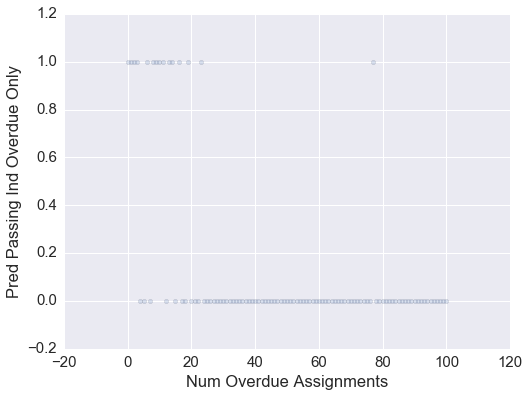

In [497]:
pred_passing_df.plot(kind='scatter',alpha=0.2,x='Num Overdue Assignments',y='Pred Passing Ind Overdue Only')

In [509]:
pred_passing_df.columns

Index([u'Pred Passing Ind Overdue Only', u'Num Overdue Assignments'], dtype='object')

## A number of overdue assignments above 20 (x axis) is associated with higher prediction of not passing (0 on y axis). For assignments < 20, there doesn't seem to be a strong association.

## It could be that when a student gets behind by 20 or more assignments, the likelihood of their passing drops significantly, but that other factors are at play for students who don't get behind.

## Perform test-train split to create and test model.

In [511]:
from sklearn.cross_validation import train_test_split
from sklearn import metrics

In [512]:
feature_cols = ['OverdueActivities']
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [513]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [514]:
# test the model on the testing set, and check the accuracy
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.932725199544


## The number of overdue activities is, in this model, highly predictive of whether a student will pass or not. This makes sense, because missing work will contribute to a lower grade. Because of the high correlation, however, this predictive power isn't very interesting or surprising.

## Repeat with other features (by themselves) at first.

In [536]:
feature_cols = ['TotalPointsAttempted']
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.857468643101


In [537]:
# Test on total count of scored activities in course
# Is there a 'fatigue' factor? i.e., the more scored activities, the less are done?
feature_cols = ['NumOfScoredActivitiesByCourse']
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.642246294185


In [538]:
# Test on total count of activities in course
feature_cols = ['ActivityCountTotal']
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.642246294185


## Is the 'Number of Scored Activities' and the 'Activity Count' the same?

In [541]:
activ_scored_vs_activ_total = enr_complete['NumOfScoredActivitiesByCourse'] == enr_complete['ActivityCountTotal']
activ_scored_vs_activ_total.value_counts()

True    28064
dtype: int64

## Yes, those two columns have the same information. I'll need to pick one if this feature is included in final model, but it doesn't seem to matter which one.

## Just to test model so far, create model on grade dummies columns created earlier - this should be a perfect predictor of passing or not.

In [525]:
grade_dummies.columns

Index([u'Grade_A', u'Grade_B', u'Grade_C', u'Grade_D', u'Grade_E', u'Grade_O'], dtype='object')

In [527]:
# Create model on grades
feature_cols = list(grade_dummies.columns)
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

1.0


## Not surprisingly, final grade perfectly predicts whether a student passes a course. This check was more for verification of the model set-up than anything.

## Now test model on predicting passing based on subject.

In [524]:
subject_dummies.columns

Index([u'Subject_Electives', u'Subject_English', u'Subject_Math',
       u'Subject_Science', u'Subject_Social Studies',
       u'Subject_World Language'],
      dtype='object')

In [528]:
# Create model on subjects
feature_cols = list(subject_dummies.columns)
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.725057012543


In [556]:
# Create model on semester ID
feature_cols = ['SemesterID']
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.725057012543


## Create dummies for track name (AP, Honors, Core, etc.) and create model on those columns.

In [529]:
track_dummies = pd.get_dummies(enr_complete.TrackName, prefix='Track')
enr_complete = pd.concat([enr_complete, track_dummies], axis=1)

In [531]:
feature_cols = list(track_dummies.columns)
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.462086659065


## The model is not very predictive of passing based on track.
## There is a tendency to believe that Honors and AP students will pass at  a higher rate than core or prescriptive students--the former are often more highly motivated academically--but with this model that belief is not borne out.

## Calculate null accuracy (i.e., accuracy achievable by always predicting the most common class).

In [542]:
# calculate the counts of each class
y_test.value_counts()

1    5087
0    1929
Name: Passing_binary, dtype: int64

In [543]:
# compute null accuracy
y_test.value_counts().head() / len(y_test)

1    0.725057
0    0.274943
Name: Passing_binary, dtype: float64

## About 72.5% of students pass. Just by guessing, for any feature we choose we could guess that 72.% of the students would pass. This is a high bar for a model -- any feature or combination of features needs to have a higher accuracy than this in order to be helpful.

## The model so far has used a neighbor value of 1. Many other neighbor values are possible.

## Calculate optimum neighbor value for different predictors.


In [547]:
feature_cols = ['NumOfScoredActivitiesByCourse']
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

k_range = range(1, 50)
testing_error = []

for k in k_range:

    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # calculate testing error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

# Find value of k with minimum testing error
min(zip(testing_error, k_range))


(0.27494298745724055, 25)

In [548]:
feature_cols = list(track_dummies.columns)
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

k_range = range(1, 50)
testing_error = []

for k in k_range:

    # instantiate the model with the current K value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # calculate testing error
    knn.fit(X_train, y_train)
    y_pred_class = knn.predict(X_test)
    testing_accuracy = metrics.accuracy_score(y_test, y_pred_class)
    testing_error.append(1 - testing_accuracy)

# Find value of k with minimum testing error
min(zip(testing_error, k_range))

(0.27109464082098067, 31)

In [549]:
# Optimum k value for track is 31
# Re-run KNN test with that k value

feature_cols = list(track_dummies.columns)
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)

0.728905359179


In [550]:
enr_complete.shape

(28064, 158)

## A k-value of 31 seems high, but given that the data contains 28,000 rows, predicting class based on the 31 nearest rows in terms of track name may be ok. 
## What's the count by track?

In [555]:
enr_complete[track_dummies.columns].sum()

Track_Advanced Placement     6625.0
Track_Core                  16895.0
Track_Foundations             245.0
Track_Honors                 1914.0
Track_Literacy Advantage      728.0
Track_Prescriptive           1657.0
dtype: float64

## Create and test models using cross-validation.

In [557]:
from sklearn.cross_validation import cross_val_score

In [558]:
#knn = KNeighborsClassifier(n_neighbors=5)
#scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
#print scores

feature_cols = ['OverdueActivities']
X = enr_complete[feature_cols]
y = enr_complete.Passing_binary
knn = KNeighborsClassifier(n_neighbors=1)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print scores.mean()

0.910026858698


In [579]:
# search for an optimal value of K for KNN
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

k_score_dict = {} 
for k in range(0,len(k_scores)):
    k_score_dict[k+1] = k_scores[k]
print k_score_dict

for i, v in k_score_dict.iteritems():
    if v == max(k_score_dict.values()):
        print "\nOptimal k(s): k {},score {}".format(i, v)

{1: 0.9100268586984317, 2: 0.90870622300912129, 3: 0.9246700314839128, 4: 0.91144912398240441, 5: 0.9213551331553681, 6: 0.92292278256400895, 7: 0.92823050907300897, 8: 0.92605608765191894, 9: 0.92940807178732565, 10: 0.92773220034603587, 11: 0.93090462314896827, 12: 0.92955081390362637, 13: 0.93001343395465952, 14: 0.9306904274499459, 15: 0.93065497997251878, 16: 0.9317953298919367, 17: 0.93054830744195238, 18: 0.929693035480323, 19: 0.93183180610553029, 20: 0.93086912491434703, 21: 0.93037025753234892, 22: 0.93015632845117224, 23: 0.93076217306984665, 24: 0.93058398347611893, 25: 0.93229504826487075, 26: 0.93108282546594123, 27: 0.93215254737424014, 28: 0.93311477118036978, 29: 0.93343551244907963, 30: 0.9324372441235026}
optimal k(s): {}.format(i, v)


In [583]:
for i, v in k_score_dict.iteritems():
    if v == max(k_score_dict.values()):
        print "\nOptimal k(s): k {},score {}".format(i, v)


Optimal k(s): k 29,score 0.933435512449


## The models created so far have only used one feature. If additional features are added with different scaling, then standardization/rescaling of the X input will be necessary.

## Continued work will concentrate on choosing more features and putting them into the model to test their predictive power.

## I may also need to build other types of classification models with the same features and then compare them to KNN. 

## I could also tune the KNN model to try to achieve higher accuracy scores.